Importar Librerías

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


Cargar dataset

In [3]:
rental = pd.read_csv('../datasets/dataset_rental_price.csv')

rental.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,0.0,Semifurnished,All,"Bella Casa Baner, Baner, , Pune, Maharashtra",1,No Direction,Not provided,No,...,0,0,0,0,0,0,0,0,0.0,18500.0
1,2,2,1050.0,Semifurnished,All,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",2,West,Not provided,Yes,...,0,0,0,0,0,0,0,63000,0.0,21000.0
2,2,2,900.0,Semifurnished,All,"Simplicity Apartments, Handewadi, , Pune, Maha...",6,No Direction,Not provided,Yes,...,0,0,0,0,0,0,0,25000,0.0,12000.0
3,3,3,1100.0,Furnished,Family Only,"GK Dwarka Queens Park, Rahatani, , Pune, Mahar...",1,East,Others,Yes,...,0,0,0,0,0,0,24000,3,0.0,24000.0
4,1,1,605.0,Semifurnished,Family Only,"Anandtara Sayajiraje Avenue, Sasane Colony, , ...",4,East,Vitrified,Yes,...,0,0,1,0,0,0,0,3,0.0,13500.0


In [4]:
print(rental.isnull().sum())

bedroom                  0
bathrooms                0
area                     0
furnishing               0
avalable_for            48
address                  0
floor_number             0
facing                   0
floor_type               0
gate_community           0
corner_pro               0
parking                  0
wheelchairadption    13179
petfacility          12459
aggDur                   0
noticeDur                0
lightbill                0
powerbackup              0
propertyage              0
no_room                  0
pooja_room               0
study_room               0
others                   0
servant_room             0
store_room               0
maintenance_amt          0
brok_amt                 0
deposit_amt              0
mnt_amt                  0
rent                     0
dtype: int64


In [5]:
rental.describe()

,bedroom,bathrooms,area,floor_number,parking,aggDur,noticeDur,lightbill,powerbackup,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
count,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042.00000,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,16042.000000,1.604200e+04,16042.000000,1.604200e+04
mean,1.795911,1.778581,534.948036,3.067947,0.882122,7.439908,0.724847,0.173731,0.709513,0.75053,0.061464,0.049744,0.124610,0.031729,0.044072,6949.279890,1.490595e+05,254.167965,2.486475e+04
std,0.790971,0.814797,998.850161,2.402256,0.562534,7.726291,0.701307,0.378890,0.842586,0.43272,0.240186,0.217423,0.330287,0.175284,0.205261,17199.295354,1.421182e+07,1248.647638,9.746501e+05
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.600000e+03
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,1.050000e+04
50%,2.000000,2.000000,520.000000,3.000000,1.000000,11.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+04,0.000000,1.500000e+04
75%,2.000000,2.000000,840.000000,5.000000,1.000000,11.000000,1.000000,0.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,5.000000e+04,0.000000,2.100000e+04
max,22.000000,22.000000,72775.000000,9.000000,9.000000,36.000000,6.000000,1.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,300000.000000,1.800050e+09,45000.000000,1.234568e+08


In [6]:
rental.describe(include='O')

,furnishing,avalable_for,address,facing,floor_type,gate_community,corner_pro,wheelchairadption,petfacility,propertyage,maintenance_amt
count,16042,15994,16042,16042,16042,16042,16042,2863,3583,16042,16042
unique,4,7,8645,9,15,2,2,1,1,6,217
top,Unfurnished,All,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",East,Not provided,Yes,No,Yes,Yes,1 to 5 Year Old,0
freq,7028,7926,112,5877,6429,9387,13770,2863,3583,5602,13277


In [7]:
# show distinct maintenance_amt colums
print(rental['maintenance_amt'].unique())

['0' 'Maintenance 600/ (/ month' 'Maintenance 900/ (/ month'
 'Maintenance 1/ (/ month' 'Maintenance 500/ (/ month'
 'Maintenance 2800/ (/ month' 'Maintenance 1000/ (/ month'
 'Maintenance 100/ (/ month' 'Maintenance 2000/ (/ month'
 'Maintenance 100/ ((one time fee' 'Maintenance 1500/ (/ month'
 'Maintenance 700/ (/ month' 'Maintenance 2500/ (/ month'
 'Maintenance 1200/ (/ month' 'Maintenance 4000/ (/ month'
 'Maintenance 3000/ (/ month' 'Maintenance 1500/ ((one time fee'
 'Maintenance 1800/ (/ month' 'Maintenance 400/ (/ month'
 'Maintenance 1100/ (/ month' 'Maintenance 6000/ (/ month'
 'Maintenance 25000/ (/ month' 'Maintenance 500/ ((one time fee'
 'Maintenance 300/ (/ month' 'Maintenance 970/ (/ month'
 'Maintenance 1/ (/ year' 'Maintenance 1650/ (/ month'
 'Maintenance 5600/ (/ month' 'Maintenance 1600/ (/ month'
 'Maintenance 2860/ (/ month' 'Maintenance 800/ (/ month'
 'Maintenance 10/ (/ year' 'Maintenance 1275/ (/ month'
 'Maintenance 200/ (/ month' 'Maintenance 4/ (/ unit'


In [8]:
print(rental['avalable_for'].unique())

['All' 'Family Only' 'Family , Bachelors (Men Only)' nan
 'Family , Bachelors (Women Only)' 'Bachelors (Men/Women)'
 'Bachelors (Men Only)' 'Bachelors (Women Only)']


In [9]:
print(rental['propertyage'].unique())

['1 to 5 Year Old' '0 to 1 Year Old' '5 to 10 Year Old' '10+ Year Old'
 'Under Construction' 'NO age']


In [10]:
def rename(df):
    
    df.columns = df.columns.str.replace(".","")
    df.columns = df.columns.str.lower().str.replace(" ","_")

rename(rental)

In [11]:
print(rental.columns)

Index(['bedroom', 'bathrooms', 'area', 'furnishing', 'avalable_for', 'address',
       'floor_number', 'facing', 'floor_type', 'gate_community', 'corner_pro',
       'parking', 'wheelchairadption', 'petfacility', 'aggdur', 'noticedur',
       'lightbill', 'powerbackup', 'propertyage', 'no_room', 'pooja_room',
       'study_room', 'others', 'servant_room', 'store_room', 'maintenance_amt',
       'brok_amt', 'deposit_amt', 'mnt_amt', 'rent'],
      dtype='object')


In [12]:
def num_cat_column(df):
    num_col = []
    cat_col = []
    for col in df:
        if df[col].dtype !='object':
            num_col.append(col)
        else:
            cat_col.append(col)
    
    return (num_col, cat_col)

num_col, cat_col = num_cat_column(rental)

In [13]:
def cat_col_view(cat_col, df):
    for i in cat_col :
        print(df[i].value_counts())
        print('-'*50)

cat_col_view(cat_col, rental)

furnishing
Unfurnished      7028
Semifurnished    6322
Furnished        2686
Unfurnishe          6
Name: count, dtype: int64
--------------------------------------------------
avalable_for
All                                7926
Family Only                        6593
Family , Bachelors (Women Only)     661
Family , Bachelors (Men Only)       395
Bachelors (Men/Women)               167
Bachelors (Men Only)                144
Bachelors (Women Only)              108
Name: count, dtype: int64
--------------------------------------------------
address
Paranjape Blue Ridge, Hinjewadi, , Pune, Maharashtra           112
Kharadi, , Pune, Maharashtra                                    58
Kolte Patil Life Republic, Hinjewadi, , Pune, Maharashtra       49
Hadapsar, , Pune, Maharashtra                                   49
Rohan Abhilasha, Wagholi, , Pune, Maharashtra                   48
                                                              ... 
Lunkad Arcade, Viman Nagar, , Pune, Maharash

In [14]:
# check if all values in address end in Pune, Maharashtra
# make all address to lowercase
address = rental['address'].str.lower().str.split(',')
def check():
    address_str = address.str
    print(address_str[-1].nunique())
    print(address_str[-2].nunique())
    print(address_str[-3].nunique())
    print(address_str[-4].nunique())
    print(address_str[-5].nunique())
    print(address_str[-6].nunique())
    print(address_str[-7].nunique())
    print(address_str[-8].nunique())
    print(address_str[-9].nunique())
    print(address_str[-10].nunique())
    print(address_str[-11].nunique())
    print(address_str[-12].nunique())
    print(address_str[-13].nunique())
    # print unique values count in each position of address
    print(type(address))
    # print(address)
    # print dimensions of address
    print(address.shape)
    dic = {}
    for add in address:
        dic[len(add)] = dic.get(len(add), 0) + 1
    for a, b in dic.items():
        print(a, b)
    
check()
for i in range(10):
    print(address[i])
# delete all repeated values in each row of address, just keep the last value
for i in range(len(address)):
    # iterate in reverse order
    repeated = set()
    new_address = []
    for j in range(len(address[i])-1, -1, -1):
        address[i][j] = address[i][j].strip()
        # if value is not repeated, add to new_address front
        # ignore empty string or string full of spaces
        if address[i][j] not in repeated and address[i][j].strip():
            # ignore the addresses that has a repeated value in the split by spaces
            has_repeated = False
            for k in address[i][j].split():
                if k in repeated:
                    has_repeated = True
                    break
            if not has_repeated:
                new_address.insert(0, address[i][j])
                repeated.add(address[i][j])
    # erase spaces in the begining and end of each value
    address[i] = new_address
print("#" * 50)
print("#" * 50)
print("#" * 50)
check()
# print addresses with lenght > 5
for i in range(len(address)):
    if len(address[i]) > 5:
        print(address[i])
# print top 5 colums in each position of address from -1 to -10
most_common = {}
for i in range(-1, -11, -1):
    counts = address.str[i].value_counts()
    print("______", i, "______")
    for j in range(30):
        if(j < len(counts)):
            # also print the count of each value
            print(counts.index[j], counts[j])
            
# transform address column of rental into a new column called zone
# which has the value -3 of address
# make a list with address[-3] and address[-4]

1
1
1
1658
7337
404
150
47
17
3
2
0
0
<class 'pandas.core.series.Series'>
(16042,)
5 14192
4 1426
7 108
6 269
8 30
9 14
10 1
11 2
['bella casa baner', ' baner', ' ', ' pune', ' maharashtra']
['paranjape blue ridge', ' hinjewadi', ' ', ' pune', ' maharashtra']
['simplicity apartments', ' handewadi', ' ', ' pune', ' maharashtra']
['gk dwarka queens park', ' rahatani', ' ', ' pune', ' maharashtra']
['anandtara sayajiraje avenue', ' sasane colony', ' ', ' pune', ' maharashtra']
['new sanghvi', ' ', ' pune', ' maharashtra']
['swamy samarth apartment', ' ganesh peth', ' ', ' pune', ' maharashtra']
['maha laxmi apartment', ' wagholi', ' ', ' pune', ' maharashtra']
['ram india livogue', ' malwadi', ' ', ' pune', ' maharashtra']
['urban bliss', ' lohegaon', ' ', ' pune', ' maharashtra']
##################################################
##################################################
##################################################
1
1
1331
7104
312
74
23
3
0
0
0
0
0
<class 'pandas.core.se

Codificar direcciones

In [15]:
from sklearn.preprocessing import OrdinalEncoder
rental_prep = rental.copy()

for i in [-3, -4]:
    new_address = pd.DataFrame(address.str[i])
    ordinal_encoder = OrdinalEncoder()
    address_encoded = ordinal_encoder.fit_transform(new_address)
    # replace nan with 0
    address_encoded = pd.DataFrame(address_encoded).fillna(0)
    rental_prep['address_' + str(i + 4)] = address_encoded

if 'address' in rental.columns:
    rental_prep.drop('address', axis=1, inplace=True)
rental_prep.head()

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,...,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent,address_1,address_0
0,2,2,0.0,Semifurnished,All,1,No Direction,Not provided,No,No,...,0,0,0,0,0,0,0.0,18500.0,94.0,0.0
1,2,2,1050.0,Semifurnished,All,2,West,Not provided,Yes,Yes,...,0,0,0,0,0,63000,0.0,21000.0,381.0,3996.0
2,2,2,900.0,Semifurnished,All,6,No Direction,Not provided,Yes,No,...,0,0,0,0,0,25000,0.0,12000.0,365.0,5933.0
3,3,3,1100.0,Furnished,Family Only,1,East,Others,Yes,No,...,0,0,0,0,24000,3,0.0,24000.0,931.0,1776.0
4,1,1,605.0,Semifurnished,Family Only,4,East,Vitrified,Yes,Yes,...,1,0,0,0,0,3,0.0,13500.0,1038.0,389.0


In [16]:
if 'others' in rental_prep.columns:
    rental_prep.drop('others', axis=1, inplace=True)

categorizar lo demas

In [17]:
ordinal_encoder = OrdinalEncoder()
address_encoded = ordinal_encoder.fit_transform(pd.DataFrame(rental_prep['furnishing']))
# replace nan with 0
address_encoded = pd.DataFrame(address_encoded).fillna(0)
rental_prep['address_' + str(i + 4)] = address_encoded
rental_prep.head()

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,...,study_room,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent,address_1,address_0
0,2,2,0.0,Semifurnished,All,1,No Direction,Not provided,No,No,...,0,0,0,0,0,0,0.0,18500.0,94.0,1.0
1,2,2,1050.0,Semifurnished,All,2,West,Not provided,Yes,Yes,...,0,0,0,0,0,63000,0.0,21000.0,381.0,1.0
2,2,2,900.0,Semifurnished,All,6,No Direction,Not provided,Yes,No,...,0,0,0,0,0,25000,0.0,12000.0,365.0,1.0
3,3,3,1100.0,Furnished,Family Only,1,East,Others,Yes,No,...,0,0,0,0,24000,3,0.0,24000.0,931.0,0.0
4,1,1,605.0,Semifurnished,Family Only,4,East,Vitrified,Yes,Yes,...,0,0,0,0,0,3,0.0,13500.0,1038.0,1.0


In [18]:
# convert colums that appear as float to int
for col in rental_prep.columns:
    if rental_prep[col].dtype == 'float64':
        rental_prep[col] = rental_prep[col].astype('int64')
rental_prep.head()
# erase colums with rent higher than 1000000
rental_prep = rental_prep[rental_prep['rent'] < 1000000]

In [19]:
rental_prep['rent'].describe()

count    16041.000000
mean     17169.965214
std      10120.660429
min       1600.000000
25%      10500.000000
50%      15000.000000
75%      21000.000000
max      98000.000000
Name: rent, dtype: float64

<Axes: >

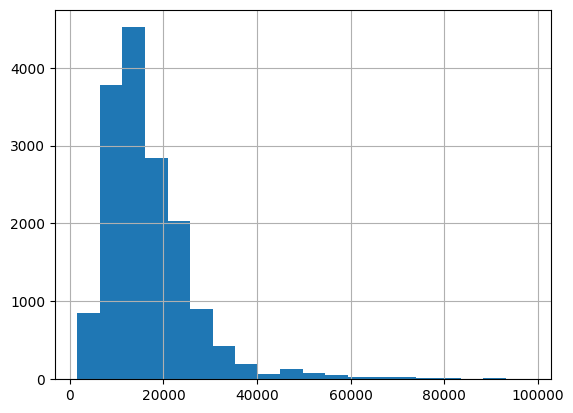

In [20]:
# histogram of column rent with 20 bins and bin interval of 1000
rental_prep['rent'].hist(bins=20)

<Axes: >

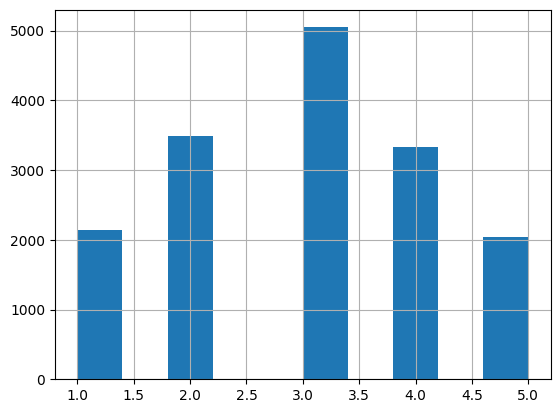

In [21]:
bins = [0, 8000, 12000, 18000, 25000, np.inf]

# Define the labels for the categorical values
labels = [1, 2, 3, 4, 5]

# Create a new column 'rent_category' with the categorical values
rental_prep.loc[:, 'rent_category'] = pd.cut(rental['rent'], bins=bins, labels=labels)

# Print the output of the describe function for the 'rent' column
# print(rental_prep.head())
rental_prep['rent_category'].hist()
# if 'rent' in rental_prep.columns:
#     rental_prep.drop('rent', axis=1, inplace=True)

In [22]:
rental_prep['area'].describe()

count    16041.000000
mean       534.974628
std        998.873643
min          0.000000
25%          0.000000
50%        520.000000
75%        840.000000
max      72775.000000
Name: area, dtype: float64

<Axes: >

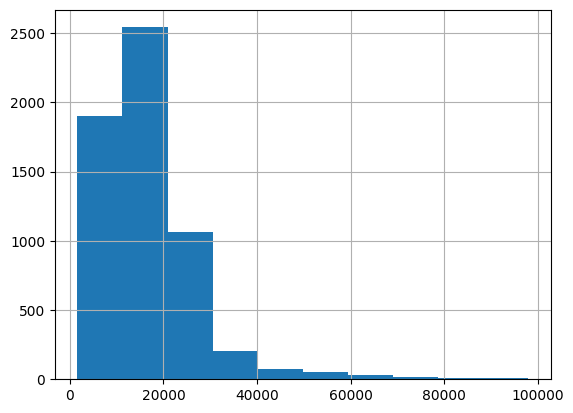

In [23]:
# plot histogram of rent for rows with area 0 of rental datasetframe
rental_prep[rental_prep['area'] == 0]['rent'].hist()

In [43]:
from sklearn.impute import SimpleImputer

# set values with 0 in area to nan
rental_prep['area'] = rental_prep['area'].replace(0, np.nan)

imputer = SimpleImputer(strategy="median")
area_ax = rental_prep['area'].copy()
area = pd.DataFrame(rental_prep['area'])
imputer.fit(area)
area = pd.DataFrame(imputer.transform(area))
rental_prep['area'] = area
area.mean()

0    811.36575
dtype: float64

<Axes: ylabel='area'>

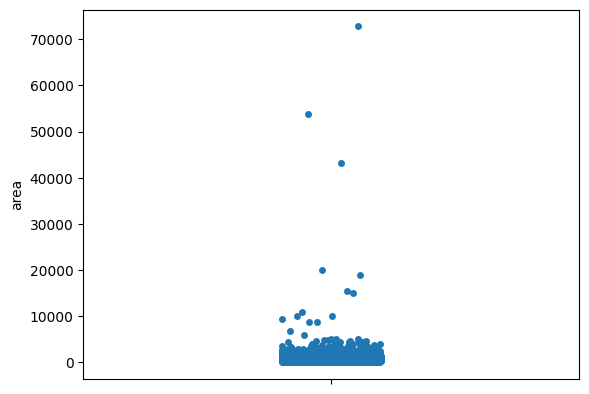

In [44]:
# histogram of column rent with 20 bins and bin interval of 1000
# rental_prep['area'].hist(bins=20)
sns.stripplot(y="area", data = rental_prep)

<Axes: >

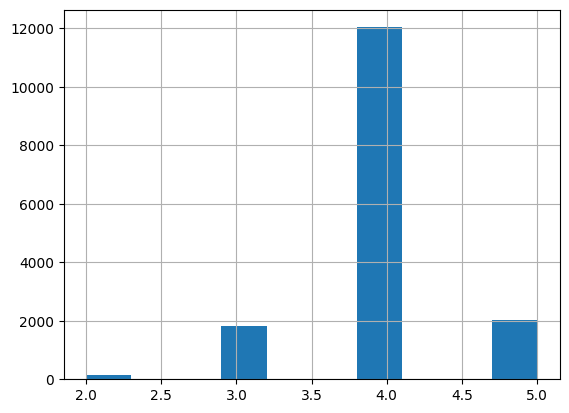

In [45]:
bins = [-1, 1, 100, 500, 1000, np.inf]

# Define the labels for the categorical values
labels = [1, 2, 3, 4, 5]

# Create a new column 'area_category' with the categorical values
rental_prep['area_category'] = pd.cut(rental_prep['area'], bins=bins, labels=labels)

# historgram of area_category
rental_prep['area_category'].hist()